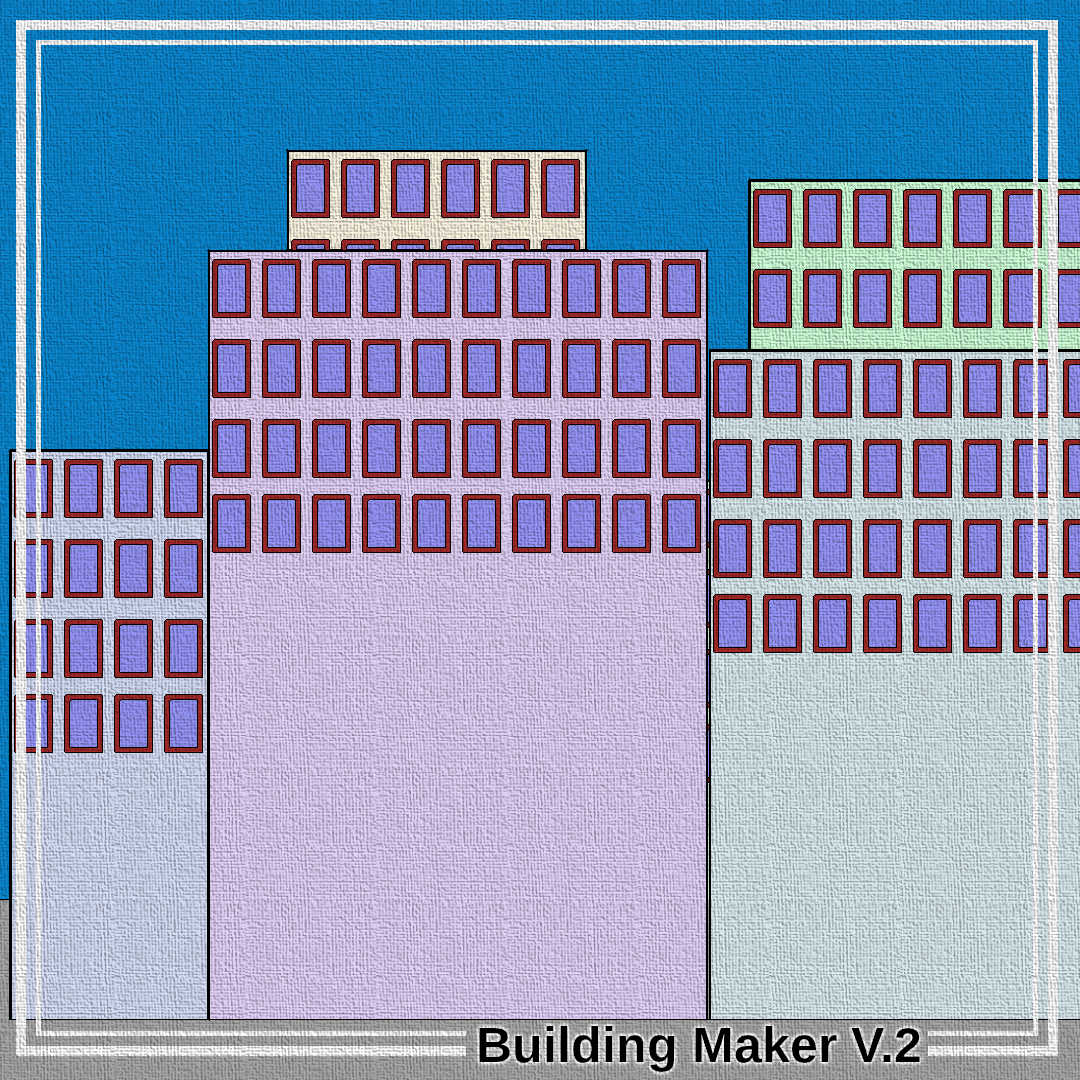

In [6]:
import random
from PIL import Image
from random import randint
import time
from OutlineImage import outlineP
def random_color():
  r = random.randint(200, 255)
  g = random.randint(200, 255)
  b = random.randint(200, 255)
  a = 255
  return (r, g, b,a)
def random_light_blue():
  r = random.randint(0, 50)
  g = random.randint(100, 255)
  b = random.randint(200, 255)
  a = 255
  return (r, g, b,a)
def create_window(width, height, color):
    glass = Image.new("RGB", (width-10,height-10), color="#9696fa")
    window = Image.new("RGB", (width,height), color="brown")
    window.paste(glass, (5,5))
    return window
def creatbuilding():
    width = 40;height =60;color = "gray"
    im = create_window(width, height, "black")
    im = create_window(width-2, height-2, color)
    #im.paste(im2,(0,0))
    # Create a new image for the building
    buildingwidth = 400
    buildingheight = 600
    buildingwidth = randint(1,5)*100
    buildingheight = randint(5,9)*100
    building = Image.new("RGB", (buildingwidth, buildingheight), (0,0,0))
    outline = Image.new("RGB", (buildingwidth-2, buildingheight-2), color=random_color())
    building.paste(outline,(1,1))
    space = 5
    # Paste five windows onto the building image
    for i in range(0,buildingwidth,5):
        #window = create_window(100, 100, "white")
        building.paste(im, (i * 10+space, 10))
        building.paste(im, (i * 10+space, height +30))
        building.paste(im, (i * 10+space, height +110))
        building.paste(im, (i * 10+space, height +185))
    return building     

# create a new image with a random light blue background
bkground = Image.new("RGBA", (1080, 1080), color=random_light_blue())

# paste 8 building images onto the background
for i in range(8):
    imag = creatbuilding()
    w,h = imag.size
    Horizontal = randint(10,1050)
    bkground.paste(imag, (Horizontal,1080-h-100))

# create a transparent ground image and paste it onto the background
dark_gray_with_alpha = (169, 169, 169, 255)    
ground = Image.new("RGBA",(1080,200),color=dark_gray_with_alpha)
bkground.paste(ground, (0,900))    

# paste 5 more building images onto the background
for i in range(5):    
    imag = creatbuilding()
    w,h = imag.size
    Horizontal = randint(10,1050)
    bkground.paste(imag, (Horizontal,1080-h-30)) 

# create a dark gray ground image and paste it onto the background
ground =Image.new("RGBA",(1080,1040),color="darkgray") 
bkground.paste(ground, (0,1020))
bkground.save("assets/TEMPP.png")
filename1 = "assets/TEMPP.png" 
outfile_png = "assets/TEMPP.png" 
outlineP(filename1,outfile_png)
building = Image.open("assets/TEMPP.png").convert("RGBA")

pixels = building.getdata()
new_pixels = [(r, g, b, 255) for (r, g, b, a) in pixels]
building.putdata(new_pixels)

# paste the border image onto the bkground image
BORDER = Image.open("assets/border.png").convert("RGBA")
building = Image.alpha_composite(building, BORDER)
texture = Image.open("assets/canvas_texture.png").convert("RGBA")
building = Image.alpha_composite(building, texture)
timestr = time.strftime("%Y%m%d-%H%M%S")
file_png ="assets/"+timestr+"window.png"
building.save(file_png)
building